<a href="https://colab.research.google.com/github/olive-su/AI_codepresso/blob/master/RNN%2BEmbedding_%EB%AA%A8%EB%8D%B8%EC%9D%84_%EC%9D%B4%EC%9A%A9%ED%95%9C_IMDB_%EC%98%81%ED%99%94%EB%A6%AC%EB%B7%B0_%EB%B6%84%EB%A5%98_%EB%B6%84%EC%84%9D_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## RNN 모델을 이용한 영화리뷰 분류 분석

In [ ]:
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.datasets import imdb

### Step 1-1. Input tensor 와 Target tensor 준비(훈련데이터)
* IMDB 영화 리뷰 데이터 down

In [ ]:
(train_x, train_y), (test_x, test_y) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [ ]:
print(train_x[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [ ]:
word_idx = imdb.get_word_index()

1646592/1641221 [==============================] - 0s 0us/step


In [ ]:
idx_word = {idx+3 : word  for word, idx in word_idx.items()}

In [ ]:
idx_word[0] = '<pad>'
idx_word[1] = '<sos>'
idx_word[2] =  '<unk>'

In [ ]:
tokens = [idx_word[idx] for idx in train_x[0]]

In [ ]:
print(tokens)

['<sos>', 'this', 'film', 'was', 'just', 'brilliant', 'casting', 'location', 'scenery', 'story', 'direction', "everyone's", 'really', 'suited', 'the', 'part', 'they', 'played', 'and', 'you', 'could', 'just', 'imagine', 'being', 'there', 'robert', '<unk>', 'is', 'an', 'amazing', 'actor', 'and', 'now', 'the', 'same', 'being', 'director', '<unk>', 'father', 'came', 'from', 'the', 'same', 'scottish', 'island', 'as', 'myself', 'so', 'i', 'loved', 'the', 'fact', 'there', 'was', 'a', 'real', 'connection', 'with', 'this', 'film', 'the', 'witty', 'remarks', 'throughout', 'the', 'film', 'were', 'great', 'it', 'was', 'just', 'brilliant', 'so', 'much', 'that', 'i', 'bought', 'the', 'film', 'as', 'soon', 'as', 'it', 'was', 'released', 'for', '<unk>', 'and', 'would', 'recommend', 'it', 'to', 'everyone', 'to', 'watch', 'and', 'the', 'fly', 'fishing', 'was', 'amazing', 'really', 'cried', 'at', 'the', 'end', 'it', 'was', 'so', 'sad', 'and', 'you', 'know', 'what', 'they', 'say', 'if', 'you', 'cry', 'at'

### Step 1-2. 입력 데이터의 전처리 
* RNN 모델에 데이터를 입력하기 위해 시퀀스 데이터의 길이를 통일

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
train_x = pad_sequences(train_x, maxlen=800)
test_x = pad_sequences(test_x, maxlen=800)

In [ ]:
train_x.shape, test_x.shape

((25000, 800), (25000, 800))

In [ ]:
train_x[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

### Step2. RNN 모델 디자인

In [ ]:
from tensorflow.keras import models, layers

In [ ]:
model = models.Sequential()

In [ ]:
# embedding layer: 32차원, 
# RNN hidden layer : RNN1개[32], activation : tanh
# output layer : 직접 설계
model.add(layers.Embedding(input_dim=10000,
                           output_dim=32,
                           input_length=800))
model.add(layers.SimpleRNN(units=32))
model.add(layers.Dense(units=1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 800, 32)           320000    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 32)                2080      
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________


### Step 3. 모델의 학습 정보 설정

In [ ]:
# loss : binary crossentropy/ optimizer : rmsprop/ metric : accuracy
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics='accuracy')

### Step 4. 모델에 input, target 데이터 연결 후 학습

In [ ]:
# batch size : 128, epochs : 10, validation data set percent : 20%
history = model.fit(
    x=train_x, y=train_y,
    batch_size=128,
    epochs=10,
    validation_split=0.2
)

Epoch 1/10
157/157 [==============================] - 47s 289ms/step - loss: 0.6548 - accuracy: 0.6046 - val_loss: 0.5093 - val_accuracy: 0.7796
Epoch 2/10
157/157 [==============================] - 43s 276ms/step - loss: 0.4187 - accuracy: 0.8173 - val_loss: 0.3763 - val_accuracy: 0.8452
Epoch 3/10
157/157 [==============================] - 43s 276ms/step - loss: 0.3161 - accuracy: 0.8740 - val_loss: 0.3588 - val_accuracy: 0.8526
Epoch 4/10
157/157 [==============================] - 44s 280ms/step - loss: 0.2512 - accuracy: 0.9039 - val_loss: 0.3832 - val_accuracy: 0.8314
Epoch 5/10
157/157 [==============================] - 44s 282ms/step - loss: 0.2613 - accuracy: 0.8929 - val_loss: 0.4218 - val_accuracy: 0.8320
Epoch 6/10
157/157 [==============================] - 44s 282ms/step - loss: 0.1966 - accuracy: 0.9244 - val_loss: 0.4868 - val_accuracy: 0.8128
Epoch 7/10
157/157 [==============================] - 44s 282ms/step - loss: 0.1993 - accuracy: 0.9316 - val_loss: 1.0824 - val_ac

### 학습과정의 시각화 및 성능 테스트

In [ ]:
# 학습과정 시각화를 위한 정보 추출
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [ ]:
# 차트의 x 축을 위한 epoch 정보 생성
epochs = range(1, len(acc) + 1)

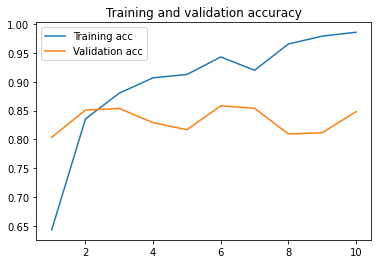

In [ ]:
# 정합도 정보 시각화
plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

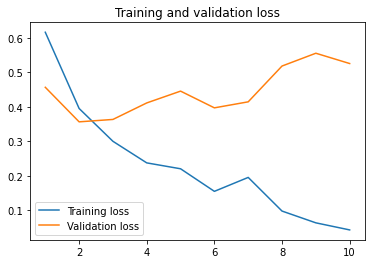

In [ ]:
# loss 정보 시각화
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# 테스트 데이터 셋을 통한 성능 측정
test_loss, test_acc = model.evaluate(x=test_x, y=test_y)

782/782 [==============================] - 32s 41ms/step - loss: 0.5655 - accuracy: 0.8164


In [ ]:
import numpy as np

In [ ]:
test_sequences = np.delete(test_x[1], np.argwhere(test_x[1] == 0))

In [ ]:
print(test_sequences)

In [ ]:
sentense = [idx_word.get(idx, "Nono")  for idx in test_sequences]

In [ ]:
print(sentense)

['<sos>', 'this', 'film', 'requires', 'a', 'lot', 'of', 'patience', 'because', 'it', 'focuses', 'on', 'mood', 'and', 'character', 'development', 'the', 'plot', 'is', 'very', 'simple', 'and', 'many', 'of', 'the', 'scenes', 'take', 'place', 'on', 'the', 'same', 'set', 'in', 'frances', '<unk>', 'the', 'sandy', 'dennis', 'character', 'apartment', 'but', 'the', 'film', 'builds', 'to', 'a', 'disturbing', 'climax', 'br', 'br', 'the', 'characters', 'create', 'an', 'atmosphere', '<unk>', 'with', 'sexual', 'tension', 'and', 'psychological', '<unk>', "it's", 'very', 'interesting', 'that', 'robert', 'altman', 'directed', 'this', 'considering', 'the', 'style', 'and', 'structure', 'of', 'his', 'other', 'films', 'still', 'the', 'trademark', 'altman', 'audio', 'style', 'is', 'evident', 'here', 'and', 'there', 'i', 'think', 'what', 'really', 'makes', 'this', 'film', 'work', 'is', 'the', 'brilliant', 'performance', 'by', 'sandy', 'dennis', "it's", 'definitely', 'one', 'of', 'her', 'darker', 'characters'

In [ ]:
model.predict(test_x[1].reshape(1, -1))

array([[0.98965585]], dtype=float32)

In [ ]:
test_y[1]

1